## DATA SCIENCE NIGERIA HACKATHON - ABDULAZEEZ ABDULLAH

In [127]:
#Import Necessary Library
import pandas as pd

In [128]:
#Import required dataset for building the model
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

# Data Exploration

In [129]:
#Check the first five rows
print(test.head())
print('\n')
print(train.head())

    Customer_ID  months_as_customer  age insured_sex insured_education_level  \
0  Customer_521                   5   26      FEMALE                     PhD   
1  Customer_737                 160   33      FEMALE             High School   
2  Customer_740                 385   51      FEMALE                      MD   
3  Customer_660                 446   57        MALE                 College   
4  Customer_411                  84   29      FEMALE             High School   

  insured_occupation insured_hobbies insured_relationship  capital-gains  \
0    farming-fishing       skydiving        not-in-family          31500   
1    exec-managerial        exercise              husband          61600   
2       craft-repair         reading              husband              0   
3       adm-clerical        sleeping            unmarried          42700   
4  machine-op-inspct     video-games        not-in-family              0   

   capital-loss  ...  incident_severity authorities_contacted 

Note: Both the test and train dataframe has 36 columns each. Clearly all these columns are not necessary in building our model. Therefore, some columns would need to be removed.

In [130]:
#Identify missing or null data in the test dataframe
test.isnull().sum()

Customer_ID                      0
months_as_customer               0
age                              0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                  0
bodily_injuries                  0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
incident_date                    0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state      

In [131]:
#Identify missing or null data in the train dataframe
train.isnull().sum()

Customer_ID                      0
months_as_customer               0
age                              0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                  0
bodily_injuries                  0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
incident_date                    0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state      

NB: Only the _c39 column has missing rows. As this column isn't required for the model, no replacement will be done. Hence, the _c39 column will be dropped

Identify unnecessary columns
Out of the 36 columns, 4 columns are not required for our model. They include:
* policy_bind_date
* incident_date
* policy_number
* incident_location

Note: Some of the responses for the property_damage, police_report_available, collision_type were "?". We would replace this with "Not answered" to make more sense of the data

In [132]:
#Remove Unnecessary columns
train = train.drop(['policy_bind_date','incident_date','policy_number','incident_location'], axis = 1)
test = test.drop(['policy_bind_date','incident_date','policy_number','incident_location'], axis = 1)

In [133]:
#Replacing with Not answered
train[['property_damage', 'police_report_available', 'collision_type']] = train[['property_damage', 'police_report_available', 'collision_type']].replace(['?'],'Not answered')
test[['property_damage', 'police_report_available', 'collision_type']] = test[['property_damage', 'police_report_available', 'collision_type']].replace(['?'],'Not answered')

In [134]:
#Dataset descriptive statistics
train.describe()

,months_as_customer,age,capital-gains,capital-loss,policy_deductable,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,policy_annual_premium,umbrella_limit,insured_zip,witnesses,auto_year,_c39,total_claim_amount
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,7.000000e+02,700.000000,700.000000,700.000000,0.0,700.000000
mean,209.528571,39.417143,25777.571429,-27061.000000,1142.142857,11.747143,1.827143,1.001429,1256.950357,1.092857e+06,500211.260000,1.442857,2004.984286,NaN,71900.933214
std,114.746174,9.170472,28239.300780,27874.242557,617.005999,6.987445,1.014970,0.819119,249.616802,2.289793e+06,71731.677629,1.132631,6.013198,NaN,34915.974923
min,0.000000,19.000000,0.000000,-111100.000000,500.000000,0.000000,1.000000,0.000000,433.330000,0.000000e+00,430104.000000,0.000000,1995.000000,NaN,133.330000
25%,123.000000,32.000000,0.000000,-51825.000000,500.000000,6.000000,1.000000,0.000000,1084.702500,0.000000e+00,446952.000000,0.000000,2000.000000,NaN,58933.330000
50%,209.000000,39.000000,5000.000000,-27450.000000,1000.000000,12.000000,1.000000,1.000000,1256.340000,0.000000e+00,465565.000000,1.000000,2005.000000,NaN,77733.330000
75%,283.000000,45.000000,52200.000000,0.000000,2000.000000,17.250000,3.000000,2.000000,1423.890000,0.000000e+00,603417.500000,2.000000,2010.000000,NaN,95503.332500
max,479.000000,64.000000,98800.000000,0.000000,2000.000000,23.000000,4.000000,2.000000,2047.590000,1.000000e+07,620869.000000,3.000000,2015.000000,NaN,153226.670000


The statistic shows that on average, the total amount claim is 71900 with 2 vehicles involved on every occasion.

In [ ]:
#Profile the train data
from pandas_profiling import ProfileReport
profile = ProfileReport(train, title="Training Dataset", html={'style': {'full_width': True}}, sort="ascending")
profile.to_notebook_iframe()

In [ ]:
# Let's see the distribution of the total claim amount with the aid of some visualization
import matplotlib.pyplot as plt
%matplotlib inline

label = train.total_claim_amount

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (20,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median
ax[0].axvline(label.mean(), color='red', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='green', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

# Add a title to the Figure
fig.suptitle('Total Claim Amount Distribution')

# Show the figure
fig.show()

The plots show that the total claim amount ranges from 0 to just below 160,000. However, the mean and median numbers are almost at the middle of this range, with most of the data between 1000 and around 160,000 total claim amount. The few values above and below this range indicates the presence of outliers

In [ ]:
#Let's explore the numerical variables
numeric_variables = ['months_as_customer', 'age', 'capital-gains', 'capital-loss', 'umbrella_limit', 'policy_annual_premium','insured_zip', 
                     'total_claim_amount']

In [ ]:
#Show the distribution of each numeric variable
for column in numeric_variables:
    fig = plt.figure(figsize=(20, 6))
    ax = fig.gca()
    variable = train[column]
    variable.hist(bins=15, ax = ax)
    ax.axvline(variable.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(variable.median(), color='yellow', linestyle='dashed', linewidth=2)
    ax.set_title(column)
plt.show()

Several numerical features seem to be more *normally* distributed, with a few outliers

In [ ]:
#Lets explore the categorical variable
categorical_variables = train.drop(['months_as_customer', 'age', 'capital-gains', 'capital-loss', 'umbrella_limit', 'policy_annual_premium',
                                    'insured_zip', 'total_claim_amount'], axis= 'columns')
categorical_variables

In [ ]:
for columns in categorical_variables.columns:
    counts = train[columns].value_counts().sort_index()
    fig = plt.figure(figsize=(20, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='blue')
    ax.set_title(columns + ' counts')
    ax.set_xlabel(columns) 
    ax.set_ylabel("Frequency")
plt.show()

Many of the categorical features show a more or less uniform distribution (meaning there's roughly the same number of rows for each category). 

We've seen the distribution of our data. Let's see the relationship between the features and the label (total claim amount) we want to be able to predict.

For the numeric features, scatter plots can best show the relationship between the feature and the label. Also, correlation statistic can be used to quantify the relationship

In [ ]:
for columns in numeric_variables:
    fig = plt.figure(figsize=(20, 6))
    ax = fig.gca()
    feature = train[columns]
    label = train['total_claim_amount']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(columns)
    plt.ylabel('Total Claim Amount')
    ax.set_title('total_claim_amount vs ' + columns + '- correlation: ' + str(correlation))
plt.show()

The results doesn't show a clear correlation

Let's compare the categorical features to the label. We'll use a boxplot to show the distribution of the total claim amount for each category

In [ ]:
for columns in categorical_variables.columns:
    fig = plt.figure(figsize=(20, 6))
    ax = fig.gca()
    train.boxplot(column = 'total_claim_amount', by = columns, ax = ax)
    ax.set_title('Label by ' + columns)
    ax.set_ylabel("Total Claim Amount")
plt.show()

The plots show some variance in the relationship between some of the categorical variablees and total claim amounts. For example, there's a clear difference in the distribution of total claim amounts when the incident type is multi and single vehicle collision compared to parked car and vehicle theft. Similarly, there are notable differences for incident severity and auto-model categories. 

In [139]:
train.columns

Index(['Customer_ID', 'months_as_customer', 'age', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss', 'policy_state',
       'policy_csl', 'policy_deductable', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city', 'witnesses',
       'police_report_available', 'auto_make', 'auto_model', 'auto_year',
       '_c39', 'total_claim_amount'],
      dtype='object')

In [140]:
#The customer ID and the _c39 columns are unnecessary for our model
train = train.drop(['Customer_ID','_c39'], axis = 1)
test = test.drop(['Customer_ID','_c39'], axis = 1)

In [141]:
#Encode the categorical variables for the train dataset
from sklearn.preprocessing import LabelEncoder

sex_encoder = LabelEncoder()
train.insured_sex = sex_encoder.fit_transform(train.insured_sex)
print('Insured sex group now include: ', train.insured_sex.unique())
print('\n')


education_level_encoder = LabelEncoder()
train.insured_education_level = education_level_encoder.fit_transform(train.insured_education_level)
print('Insured Education Level group now include: ', train.insured_education_level.unique())
print('\n')

occupation_encoder = LabelEncoder()
train.insured_occupation = occupation_encoder.fit_transform(train.insured_occupation)
print('Insured Occupation group now include: ', train.insured_occupation.unique())
print('\n')

hobbies_encoder = LabelEncoder()
train.insured_hobbies = hobbies_encoder.fit_transform(train.insured_hobbies)
print('Insured hobbies group now include: ', train.insured_hobbies.unique())
print('\n')

relationship_encoder = LabelEncoder()
train.insured_relationship = relationship_encoder.fit_transform(train.insured_relationship)
print('Insured relationship group now include: ', train.insured_relationship.unique())
print('\n')

policy_state_encoder = LabelEncoder()
train.policy_state = policy_state_encoder.fit_transform(train.policy_state)
print('Policy state group now include: ', train.policy_state.unique())
print('\n')

policy_csl_encoder = LabelEncoder()
train.policy_csl = policy_csl_encoder.fit_transform(train.policy_csl)
print('policy_csl group now include: ', train.policy_csl.unique())
print('\n')

property_damage_encoder = LabelEncoder()
train.property_damage = property_damage_encoder.fit_transform(train.property_damage)
print('property_damage group now include: ', train.property_damage.unique())
print('\n')


incident_type_encoder = LabelEncoder()
train.incident_type = incident_type_encoder.fit_transform(train.incident_type)
print('incident_type group now include: ', train.incident_type.unique())
print('\n')


collision_type_encoder = LabelEncoder()
train.collision_type = collision_type_encoder.fit_transform(train.collision_type)
print('collision_type group now include: ', train.collision_type.unique())
print('\n')

incident_severity_encoder = LabelEncoder()
train.incident_severity = incident_severity_encoder.fit_transform(train.incident_severity)
print('incident_severity group now include: ', train.incident_severity.unique())
print('\n')

authorities_contacted_encoder = LabelEncoder()
train.authorities_contacted = authorities_contacted_encoder.fit_transform(train.authorities_contacted)
print(' group now include: ', train.authorities_contacted.unique())
print('\n')

incident_state_encoder = LabelEncoder()
train.incident_state = incident_state_encoder.fit_transform(train.incident_state)
print('incident_state group now include: ', train.incident_state.unique())
print('\n')

incident_city_encoder = LabelEncoder()
train.incident_city = incident_city_encoder.fit_transform(train.incident_city)
print('incident_city group now include: ', train.incident_city.unique())
print('\n')

police_report_available_encoder = LabelEncoder()
train.police_report_available = police_report_available_encoder.fit_transform(train.police_report_available)
print('police_report_available group now include: ', train.police_report_available.unique())
print('\n')

auto_make_encoder = LabelEncoder()
train.auto_make = auto_make_encoder.fit_transform(train.auto_make)
print('auto_make group now include: ', train.auto_make.unique())
print('\n')

auto_model_encoder = LabelEncoder()
train.auto_model = auto_model_encoder.fit_transform(train.auto_model)
print(' group now include: ', train.auto_model.unique())
print('\n')

auto_year_encoder = LabelEncoder()
train.auto_year = auto_year_encoder.fit_transform(train.auto_year)
print('auto_year group now include: ', train.auto_year.unique())
print('\n')

Insured sex group now include:  [0 1]


Insured Education Level group now include:  [3 5 2 6 1 4 0]


Insured Occupation group now include:  [ 4 10  5  8 12  9  7  1  2 11  0 13  6  3]


Insured hobbies group now include:  [13 19  9 10  8  3  7  4 12 17  5 15 11  6 14  0 16  2  1 18]


Insured relationship group now include:  [2 1 0 5 3 4]


Policy state group now include:  [2 1 0]


policy_csl group now include:  [1 2 0]


property_damage group now include:  [1 0 2]


incident_type group now include:  [1 2 0 3]


collision_type group now include:  [1 2 0 3]


incident_severity group now include:  [3 2 0 1]


 group now include:  [4 1 3 0 2]


incident_state group now include:  [0 1 6 5 4 2 3]


incident_city group now include:  [0 1 5 6 2 4 3]


police_report_available group now include:  [2 0 1]


auto_make group now include:  [ 8  4 13 12  5  2  3  1 11 10  6  7  9  0]


 group now include:  [12 27 28 11 20 13 22 18 16 24 25  5 15  2  8 32 36 38 35 19 26  6 14  1
 37  7  3 33 30 23 

In [142]:
print(train.head())

   months_as_customer  age  insured_sex  insured_education_level  \
0                 239   41            0                        3   
1                 108   31            1                        5   
2                 116   30            1                        3   
3                   8   21            1                        2   
4                 161   38            1                        6   

   insured_occupation  insured_hobbies  insured_relationship  capital-gains  \
0                   4               13                     2          51400   
1                  10               19                     1              0   
2                   5                9                     1              0   
3                   5               10                     0              0   
4                   8                8                     1          60200   

   capital-loss  policy_state  ...  incident_severity  authorities_contacted  \
0         -6300             2  ...  

# Functions Used in Model Evaluation

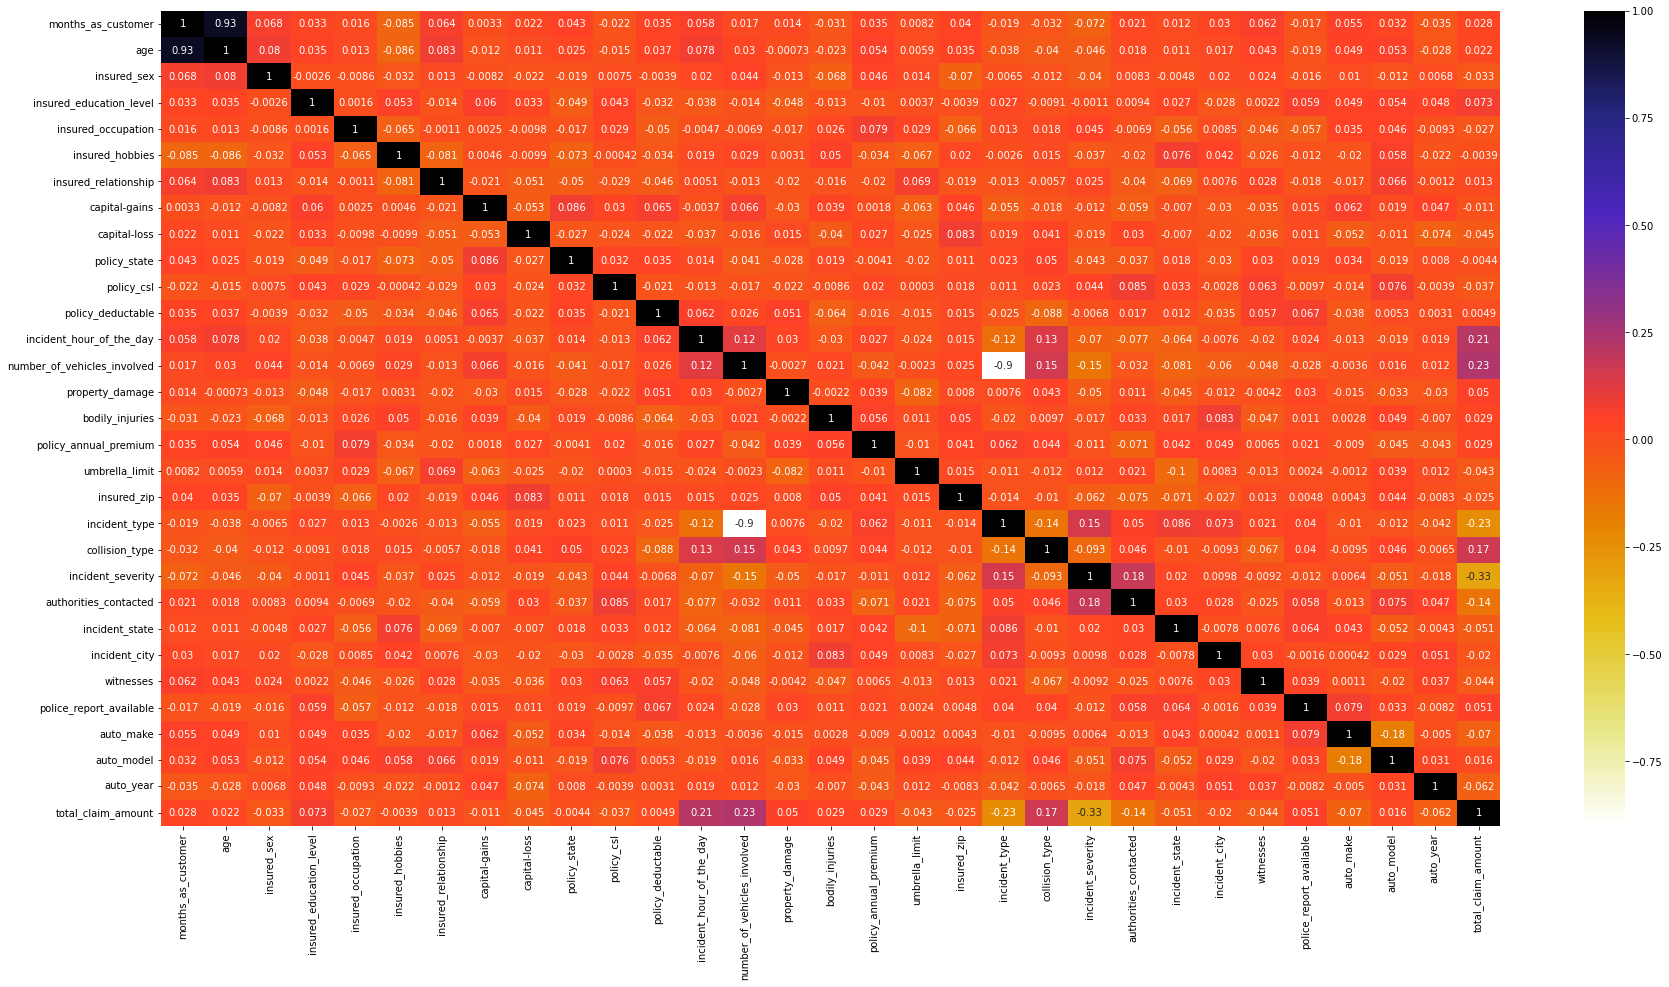

In [144]:
import seaborn as sns

# Apply Pearson Correlation
plt.figure(figsize=(30,15))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

With the following function we can select highly correlated features. It will remove the first feature that is correlated with any other feature

In [145]:
def correlation(dataset, threshold):
    col_corr = set()  #Set all the names of the correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # We are interested in absolute coefficient value
                colname = corr_matrix.columns[i]   # Getting the name of column
                col_corr.add(colname)
    return col_corr

In [146]:
correlated_features = correlation(train, 0.09)
correlated_features

{'age',
 'authorities_contacted',
 'auto_model',
 'collision_type',
 'incident_severity',
 'incident_state',
 'incident_type',
 'number_of_vehicles_involved',
 'total_claim_amount'}

# Model Creation

In [147]:
#Splitting Train data into features and labels 
x = train[correlated_features].drop(['total_claim_amount'], axis='columns')

y = train.total_claim_amount

C:\Users\User\AppData\Local\Temp/ipykernel_16444/3210540938.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  x = train[correlated_features].drop(['total_claim_amount'], axis='columns')


In [148]:
x.head()

,incident_state,incident_severity,auto_model,number_of_vehicles_involved,authorities_contacted,collision_type,age,incident_type
0,0,3,12,1,4,1,41,1
1,1,2,27,1,1,2,31,2
2,6,0,28,3,3,0,30,0
3,6,0,11,1,3,0,21,2
4,6,2,20,3,4,0,38,0


In [ ]:
#Split the Train data into train and test
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1234)

In [ ]:
print('Number of rows for X_train:', len(X_train))
print('Number of rows for X_test:', len(X_test))
print('Number of rows for y_train:', len(y_train))
print('Number of rows for y_test:', len(y_test))

# Linear Regression

In [ ]:
#Train the model
from sklearn.linear_model import LinearRegression
Linear_model = LinearRegression()
Linear_model.fit(X_train, y_train)

In [ ]:
#Make Predictions
linear_prediction = Linear_model.predict(X_test)
print(linear_prediction)

In [ ]:
print(len(linear_prediction))

# Model Evaluation

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,linear_prediction)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, linear_prediction)
print("R2:", r2)

# Lasso Model

In [ ]:
from sklearn.linear_model import Lasso
Lasso_model = Lasso()
Lasso_model.fit(X_train, y_train)

In [ ]:
# Evaluate the model using the test data
Lasso_predictions = Lasso_model.predict(X_test)
mse = mean_squared_error(y_test, Lasso_predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, Lasso_predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, Lasso_predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Total Claim Amount Predictions')
# overlay the regression line
z = np.polyfit(y_test, Lasso_predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
Decision_Tree_Model = DecisionTreeRegressor()
Decision_Tree_Model.fit(X_train, y_train)
print (Decision_Tree_Model, "\n")

# Visualize the model tree
tree = export_text(Decision_Tree_Model)
print(tree)

In [ ]:
# Evaluate the model using the test data
Decision_tree_predictions = Decision_Tree_Model.predict(X_test)
mse = mean_squared_error(y_test, Decision_tree_predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, Decision_tree_predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, Decision_tree_predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Total Claim Amount Predictions')
# overlay the regression line
z = np.polyfit(y_test, Decision_tree_predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Random Forest Regressor Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
Regressor_model = RandomForestRegressor()
Regressor_model.fit(X_train, y_train)
print (Regressor_model, "\n")

# Evaluate the model using the test data
Regressor_predictions = Regressor_model.predict(X_test)
mse = mean_squared_error(y_test, Regressor_predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, Regressor_predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, Regressor_predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Total Claim Amount Predictions')
# overlay the regression line
z = np.polyfit(y_test, Regressor_predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Save the Model

In [ ]:
saved_model = {"model": Regressor_model, "incident_type_encoder": incident_type_encoder, "collision_type_encoder": collision_type_encoder, 
               "incident_severity_encoder": incident_severity_encoder, "authorities_contacted_encoder": authorities_contacted_encoder, "incident_state_encoder": incident_state_encoder , "auto_model_encoder": auto_model_encoder}

with open('Random_Forest_Model.pkl', 'wb') as file:
    pickle.dump(saved_model,file)

# Use the Saved Model to Predict Total Claim Amount for the Test Dataset

In [149]:
# Load the model
with open('Random_Forest_Model.pkl', 'rb') as file:
    saved_model = pickle.load(file)
    
model = saved_model["model"]

incident_type_encode = saved_model["incident_type_encoder"]
collision_type_encode = saved_model["collision_type_encoder"]
incident_severity_encode = saved_model["incident_severity_encoder"]
authorities_contacted_encode = saved_model["authorities_contacted_encoder"]
incident_state_encode = saved_model["incident_state_encoder"]
auto_model_encode = saved_model["auto_model_encoder"]

In [151]:
test = test[['age', 'authorities_contacted', 'auto_model', 'collision_type', 'incident_severity', 'incident_state', 'incident_type', 'number_of_vehicles_involved']]
test.head()

,age,authorities_contacted,auto_model,collision_type,incident_severity,incident_state,incident_type,number_of_vehicles_involved
0,26,Ambulance,A5,Rear Collision,Total Loss,WV,Single Vehicle Collision,1
1,33,Ambulance,Pathfinder,Front Collision,Total Loss,NC,Multi-vehicle Collision,3
2,51,Other,Legacy,Rear Collision,Minor Damage,WV,Multi-vehicle Collision,3
3,57,Police,Wrangler,Front Collision,Total Loss,SC,Multi-vehicle Collision,3
4,29,Police,3 Series,Not answered,Trivial Damage,SC,Parked Car,1


In [154]:
# Use the loaded model to predict the total claim amount
test.authorities_contacted = authorities_contacted_encode.transform(test.authorities_contacted)
test.auto_model = auto_model_encode.transform(test.auto_model)
test.collision_type = collision_type_encode.transform(test.collision_type)
test.incident_severity = incident_severity_encode.transform(test.incident_severity)
test.incident_state = incident_state_encode.transform(test.incident_state)
test.incident_type = incident_type_encode.transform(test.incident_type)

In [155]:
test.head()

,age,authorities_contacted,auto_model,collision_type,incident_severity,incident_state,incident_type,number_of_vehicles_involved
0,26,0,5,2,2,6,2,1
1,33,0,29,0,2,0,0,3
2,51,3,21,2,1,6,0,3
3,57,4,36,0,2,4,0,3
4,29,4,0,1,3,4,1,1


In [157]:
prediction = model.predict(test)
prediction

array([62776.7999,  8424.0011,  8184.6675,  8204.801 ,  4909.7338,
        8897.6015,  8466.1345,  8409.6011,  8184.6675,  6324.2688,
       34258.9334,  8275.8675,  5024.4005, 65157.1997,  6349.0688,
       33886.6668,  8392.801 ,  8489.6011,  8204.801 ,  6301.4688,
        8392.801 , 32782.4002,  4997.0674,  6340.4021,  6349.0688,
        8392.801 ,  5024.4005,  6210.5356,  8577.2012,  6276.8021,
       67547.1999,  8220.1343,  6340.4021,  5024.4005,  8168.0001,
       11072.4004,  8174.0001,  6872.9349,  6872.9349,  8398.1348,
        7713.8668, 55143.732 ,  6276.8021,  8209.3343,  6897.2015,
        6311.2021,  8577.2012,  6324.2688, 34690.1332, 35040.    ,
        8223.0675,  6349.0688,  6188.2689,  6210.5356, 36185.8668,
        8665.0679,  6889.6019,  6340.4021, 10415.2009, 32921.7332,
        7713.8668,  6340.4021,  8168.0001,  6276.8021,  6210.5356,
        6192.0023,  8081.6011,  6155.4668,  4643.7338,  8408.5342,
       78035.7328,  6688.2686,  8897.6015,  6902.8016,  8392.8